<a href="https://colab.research.google.com/github/epjonnadula/Deep-Learning/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import sys
from sklearn.metrics import accuracy_score 


In [2]:
cancer = datasets.load_breast_cancer() 
x=pd.DataFrame(cancer.data) 
y=pd.DataFrame(cancer.target) 
x=x.to_numpy() 
y=y.to_numpy() 
x=preprocessing.normalize(x, norm='l2') 
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3,shuffle=True) 
m=np.shape(train_x)[0] 
train_x=np.nan_to_num(train_x) 
train_y=np.nan_to_num(train_y) 
ones=np.ones((m,1)) 
train_x=np.append(ones,train_x,axis=1) 
n=np.shape(train_x)[1]

print(np.shape(train_x)) 
print(np.shape(train_y))
print(np.shape(test_x)) 
print(np.shape(test_y))

(398, 31)
(398, 1)
(171, 30)
(171, 1)


In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [0]:
def hypothesis(theta,x):
    return sigmoid(np.dot(x,theta))

In [0]:
def cost(calculated,actual):
    error = (-actual * np.log(calculated)) - ((1-actual)*np.log(1-calculated))
    return np.sum(error)/len(actual) 

In [0]:
def gradient_descent(calculated,actual,x,alpha,theta):
    diff=np.subtract(calculated,actual)
    grad=np.matmul(np.transpose(diff),x)
    grads=alpha*(np.transpose(grad)/np.shape(x)[0])
    theta=np.subtract(theta,grads)
    return theta

In [7]:
theta=np.ones((n,1))
calculated=hypothesis(theta,train_x)
cost_val=cost(calculated,train_y)
print(cost_val)

1.0517701272163915


In [8]:
prev_cost=sys.maxsize
cost_list=[]
epsilon=0.00000001
theta=np.zeros((n,1))
while True:
    calculated=hypothesis(theta,train_x)
    cost_val=cost(calculated,train_y)
    theta=gradient_descent(calculated,train_y,train_x,0.1,theta)
    cost_list.append(cost_val)
    if np.abs(cost_val-prev_cost)<=epsilon:
        break
    else:
        prev_cost=cost_val
    if len(cost_list)%10000==0:
        print("Iteration ",len(cost_list), "---> Cost ",cost_list[-1])

Iteration  10000 ---> Cost  0.4029273120493313
Iteration  20000 ---> Cost  0.3302872967773515
Iteration  30000 ---> Cost  0.29562591574649294
Iteration  40000 ---> Cost  0.27469706344910766
Iteration  50000 ---> Cost  0.2603827873394749
Iteration  60000 ---> Cost  0.24982318225643238
Iteration  70000 ---> Cost  0.24163337444578814
Iteration  80000 ---> Cost  0.2350538728350314
Iteration  90000 ---> Cost  0.22962926993120866
Iteration  100000 ---> Cost  0.22506750890782815
Iteration  110000 ---> Cost  0.22117121976230034
Iteration  120000 ---> Cost  0.21780132067218405
Iteration  130000 ---> Cost  0.21485640644056916
Iteration  140000 ---> Cost  0.21226042995537403
Iteration  150000 ---> Cost  0.20995500120808472
Iteration  160000 ---> Cost  0.20789438576566238
Iteration  170000 ---> Cost  0.20604214817109084
Iteration  180000 ---> Cost  0.20436883419909346
Iteration  190000 ---> Cost  0.20285033000942826
Iteration  200000 ---> Cost  0.20146667465675827
Iteration  210000 ---> Cost  0.20

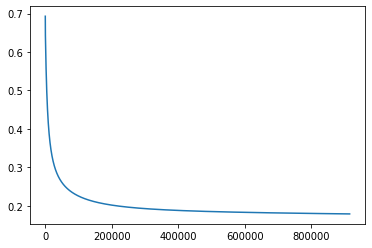

Training Cost= 0.17856385510310985


In [9]:
plt.plot(range(0,len(cost_list)),cost_list)
plt.show()
print("Training Cost=",cost_list[-1])

In [0]:
m=np.shape(test_x)[0]
test_x=np.nan_to_num(test_x)
test_y=np.nan_to_num(test_y)
ones=np.ones((m,1))
test_x=np.append(ones,test_x,axis=1)
n=np.shape(test_x)[1]

In [12]:
calculated=hypothesis(theta,test_x)
calculated = np.where(calculated > 0.5, 1, 0)
sum=0
for i in range(len(test_y)):
    if test_y[i]==calculated[i]:
        sum=sum+1
print("Test Score=",sum*100/len(test_y))

Test Score= 88.88888888888889
